In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence
from functools import partial

## Plotting functions

In [2]:
def plot_donuts(
        center: tuple[int] = (.5, .5),
        n_points:int = 300,
        colors: Sequence[str] = ('b', 'r'),
        radii: Sequence[int] = (.2, .6),
        noises: Sequence[float] = (0.06, 0.05),
        title: str = 'Not linearly separable data',
    ) -> None:
    # Create a figure and a set of subplots
    _, ax = plt.subplots()

    # Create a donut
    angles = np.random.normal(0, 2*np.pi, n_points)

    for color, radius, noise in zip(colors, radii, noises):
        xs = center[0] + radius*np.cos(angles) + np.random.normal(0, noise, n_points)
        ys = center[1] + radius*np.sin(angles) + np.random.normal(0, noise, n_points)
        ax.scatter(xs, ys, c=color, s=5)
    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')
    ax.set_title(title)

    # Display the plot
    plt.show()


def plot_activation(
        activation: callable,
        title: str = '',
        x_lim: tuple[int] = (-10, 10),
        y_lim: tuple[int] = (-1, 1),
    ) -> None:
    # Create a figure and a set of subplots
    _, ax = plt.subplots()

    # Create a range of values from -10 to 10
    x = np.linspace(-10, 10, 100)

    # Compute the activation function for each value
    y = activation(x)

    # Plot the activation function
    ax.plot(x, y)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_title(title)
    ax.grid(True)

    # Display the plot
    plt.show()


# Allow TeX in plots
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "Helvetica"
#})

## Example of non-linearly separable data

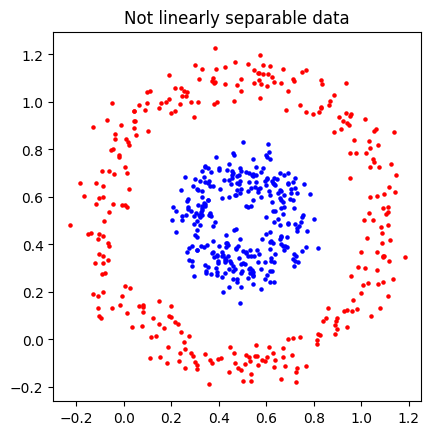

In [3]:
plot_donuts()

### Perceptron
$$
    \text{Perceptron}(x) =
        \begin{cases} 
            1 & \text{if } x \geq 0 \\
            0 & \text{otherwise}
        \end{cases}
$$

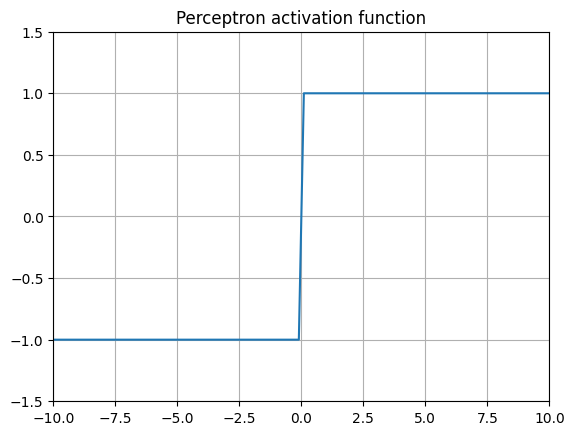

In [4]:
perceptron = lambda x: np.where(x > 0, 1, -1)
plot_activation(
    activation=perceptron,
    title='Perceptron activation function',
    y_lim=(-1.5, 1.5),        
)

### Sigmoid (logistic function)
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

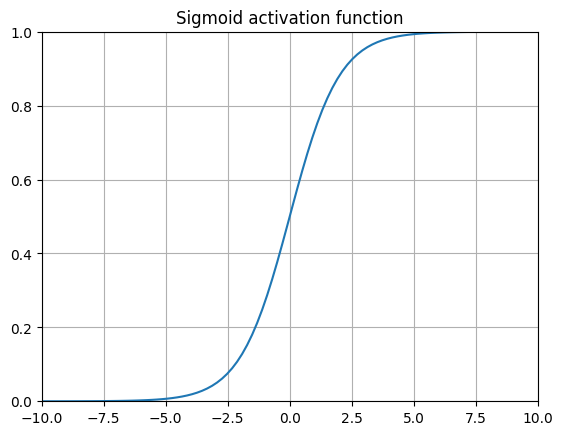

In [5]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
plot_activation(
        activation = sigmoid,
        title='Sigmoid activation function',
        y_lim=(0, 1),
)

### Softmax
$$ Softmax(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{K} e^{x_j}} $$

### tanh (hyperbolic tangent)
$$ tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}} $$

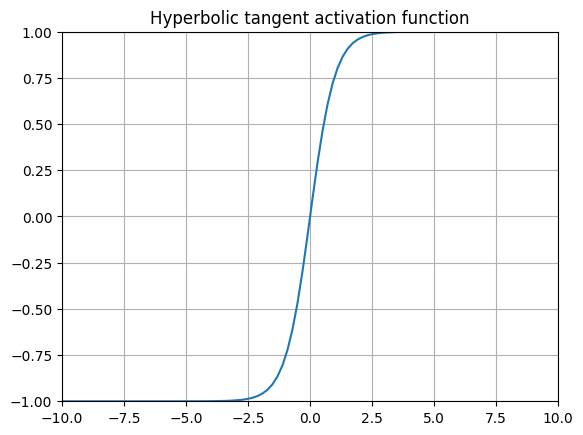

In [6]:
plot_activation(
        activation = np.tanh,
        title='Hyperbolic tangent activation function',
        y_lim=(-1, 1),
)

### ReLU (Rectified Linear Unit)
$$ {ReLU}(x) = \max(0, x) $$


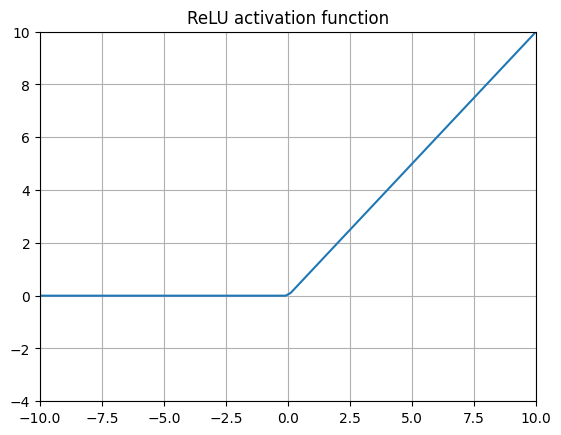

In [7]:
relu = lambda x: np.maximum(0, x)
plot_activation(
        activation = relu,
        title='ReLU activation function',
        y_lim=(-4, 10)
)

### Leaky ReLU (Leaky Rectified Linear Unit)
$$
    \text{LeakyReLU}(x) =
        \begin{cases} 
            x & \text{if } x \geq 0 \\
            \alpha x & \text{otherwise}
        \end{cases}
$$

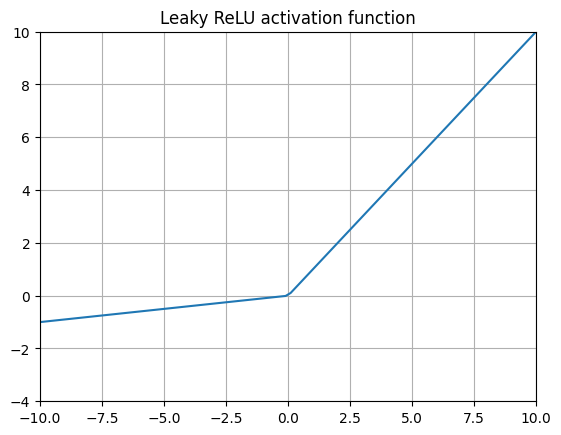

In [8]:
leaky_relu = lambda x: np.maximum(0.1*x, x)
plot_activation(
        activation = leaky_relu,
        title='Leaky ReLU activation function',
        y_lim=(-4, 10)
)

### ELU (Exponential Linear Unit)

$$
    \text{ELU}(x) = 
        \begin{cases}
            x & \text{if } x \geq 0 \\
            \alpha (e^x - 1) & \text{otherwise}
        \end{cases} 
$$

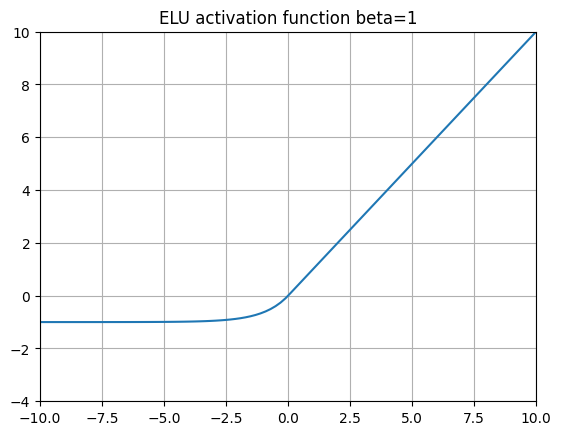

In [9]:
elu = lambda x, alpha: np.where(x > 0, x, alpha*(np.exp(x) - 1))

plot_activation(
        activation = lambda x: elu(x, 1),
        title='ELU activation function beta=1',
        y_lim=(-4, 10)
)

### GeLU (Gaussian Error Linear Unit)

$$\text{GELU}(x) = x * \Phi(x) $$

Where \(\Phi(x)\) is the standard Gaussian cumulative distribution function (CDF).

$$ \Phi(x) = \frac{1}{2} \left(1 + \text{erf}\left(\frac{x}{\sqrt{2}}\right)\right) $$

so long as \(x\) is drawn from a normal distribution with a mean of 0 and standard deviation of 1.

Often approximated with 

$$ x * sigmoid(1.702x) $$


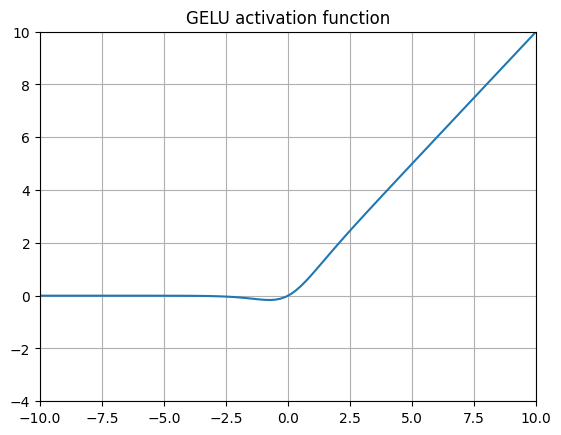

In [10]:

gelu = lambda x: x * sigmoid(1.702 * x)
plot_activation(
        activation = gelu,
        title='GELU activation function',
        y_lim=(-4, 10)
)

### SiLU (Sigmoid Weighted Linear Unit)

$$ SiLU(x) = x * sigmoid(x) $$

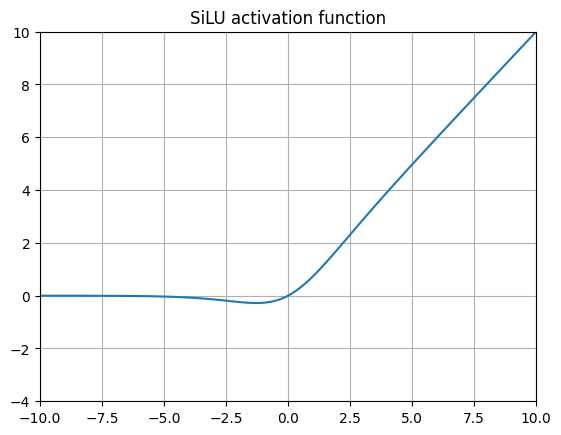

In [11]:
silu = lambda x: x * sigmoid(x)
plot_activation(
        activation = silu,
        title='SiLU activation function',
        y_lim=(-4, 10)
)

### Swish
$$ Swish(x) = x * sigmoid(\beta x) = \frac{x}{1 + e^{-\beta x}} $$


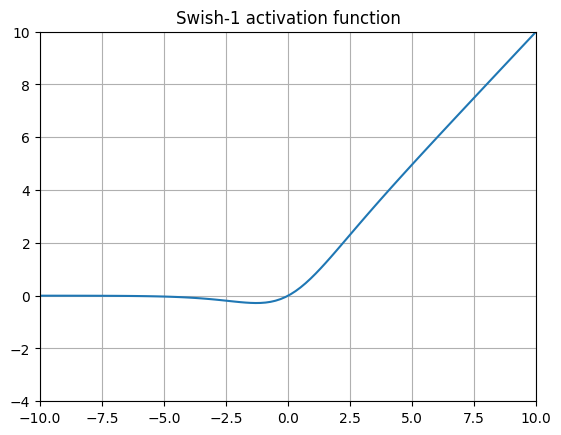

In [12]:

swish = lambda x, beta: x * sigmoid(beta * x)
plot_activation(
        activation = partial(swish, beta=1),
        title='Swish-1 activation function',
        y_lim=(-4, 10)
)

### GLU (Gated Linear Unit)
$$ GLU(x, W, V, b, c) = sigmoid(xW + b) \otimes (xV + c) $$


### GeGLU (Gaussian Error Linear Unit)

$$ GEGLU(x W, V, b, c) = GELU(xW + v) \otimes (xV + c) $$


### SwiGLU (Swish Gated Linear Unit)

$$ SwiGLU(x, W, V, b, c \beta) = Swish_{\beta}(xW + b) \otimes (xV + c) $$


### SoLU (Softmax Linear Unit)
$$ SoLU(x) = x * softmax(x) $$
